In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential, load_model
from keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_directory='/content/newexample/train'
test_directory='/content/newexample/test'
val_directory='/content/newexample/valid'

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
# Compile the model with a smaller learning rate
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
folders = glob('/content/newexample/train/*')
len(folders)

10

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_97 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_99 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation with more aggressive settings
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 1601 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
len(training_set), len(test_set)

(51, 2)

In [39]:
# Train the model with learning rate scheduling
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

r = model.fit(training_set,
              validation_data=test_set,
              epochs=50,  # Increase the number of epochs for better training
              steps_per_epoch=len(training_set),
              validation_steps=len(test_set),
              callbacks=[reduce_lr])

Epoch 1/50
51/51 [==============================] - 32s 599ms/step - loss: 2.2850 - accuracy: 0.1099 - val_loss: 2.3029 - val_accuracy: 0.1000 - lr: 1.0000e-04
Epoch 2/50
51/51 [==============================] - 30s 589ms/step - loss: 2.2982 - accuracy: 0.1093 - val_loss: 2.2640 - val_accuracy: 0.1400 - lr: 1.0000e-04
Epoch 3/50
51/51 [==============================] - 30s 584ms/step - loss: 2.2843 - accuracy: 0.1237 - val_loss: 2.2782 - val_accuracy: 0.1200 - lr: 1.0000e-04
Epoch 4/50
51/51 [==============================] - 30s 584ms/step - loss: 2.2972 - accuracy: 0.1237 - val_loss: 2.3010 - val_accuracy: 0.1000 - lr: 1.0000e-04
Epoch 5/50
51/51 [==============================] - 31s 601ms/step - loss: 2.2563 - accuracy: 0.1393 - val_loss: 2.0943 - val_accuracy: 0.3000 - lr: 1.0000e-04
Epoch 6/50
51/51 [==============================] - 30s 586ms/step - loss: 2.1429 - accuracy: 0.1974 - val_loss: 1.9092 - val_accuracy: 0.2400 - lr: 1.0000e-04
Epoch 7/50
51/51 [======================

In [40]:
model.save('VGG19model1.h5')

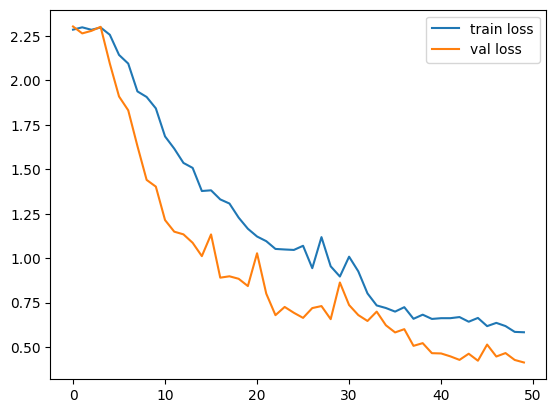

In [41]:
# Loss
plt.plot(r.history['loss'], label='train loss')
if 'val_loss' in r.history:
    plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

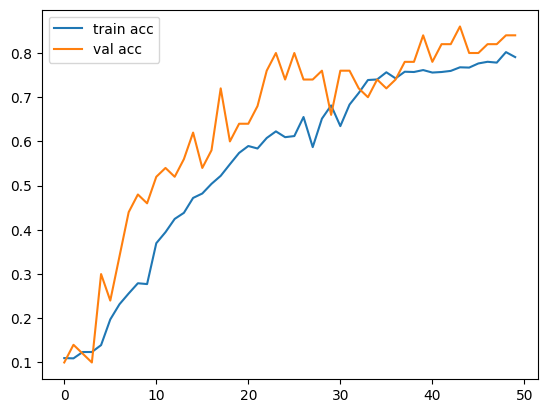

In [42]:
# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
if 'val_accuracy' in r.history:
    plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

2/2 [==============================] - 1s 180ms/step


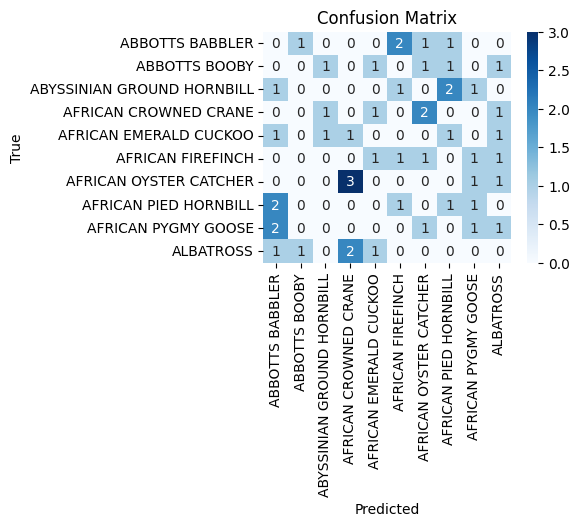

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predicted labels for the test set
Y_true = test_set.classes
Y_pred = model.predict(test_set).argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_true, Y_pred)

# Get class names
class_names = list(test_set.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [44]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Input, Lambda, Dense, Flatten
import tensorflow as tf

model1 = load_model('./VGG19model1.h5',compile=False)

In [45]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [46]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 164ms/step


'AFRICAN EMERALD CUCKOO'

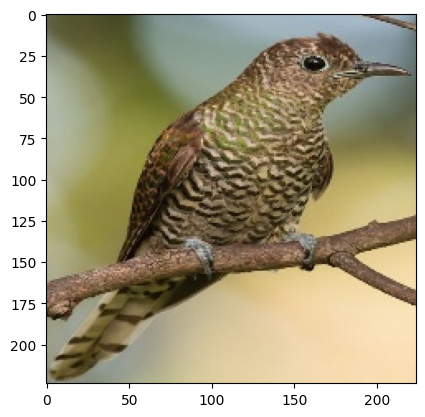

In [47]:
img='/content/newexample/valid/AFRICAN EMERALD CUCKOO/2.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 21ms/step


'AFRICAN PIED HORNBILL'

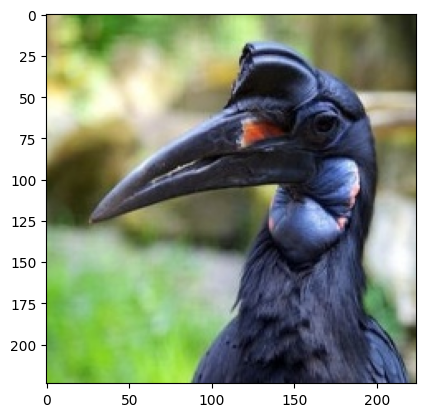

In [ ]:
img='/content/newexample/valid/ABYSSINIAN GROUND HORNBILL/4.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 18ms/step


'ABBOTTS BABBLER'

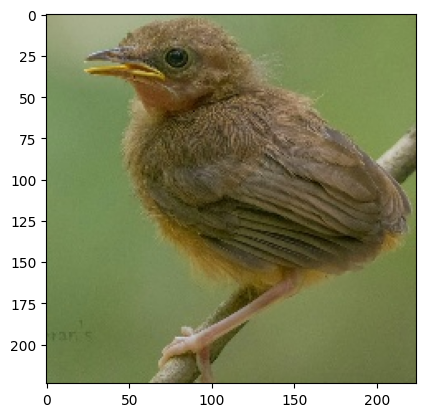

In [49]:
img= '/content/newexample/valid/ABBOTTS BABBLER/3.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)